## Observations and Insights

## Dependencies and starter code

In [30]:
#Please cite the following papers if you use this dataset:

#Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

#Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

# Dependencies and Setup
import json
import requests
import pandas as pd
import gmaps
import matplotlib.pyplot as plt

traffic = "accident_data_v2.csv"
traffic_df = pd.read_csv(traffic)

location = "accident_location.csv"
location_df = pd.read_csv(location)

date_time = "accident_date_time.csv"
date_time_df = pd.read_csv(date_time)

weather = "accident_weather.csv"
weather_df = pd.read_csv(weather)

severity = "accident_severity.csv"
severity_df = pd.read_csv(severity)

# Convert to DataFrame
traffic_df = pd.DataFrame(traffic_df)
traffic_df.head()

,ID,Severity,Start_Time,Date,Time,Street,Side,City,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Mil_Time
0,A-45835,3,7/1/2016 0:06,7/1/2016,12:06 AM,Sepulveda Blvd,R,Sherman Oaks,CA,64.9,90.0,9.0,SE,5.8,NaN,Clear,0:06
1,A-1853,3,7/1/2016 0:08,7/1/2016,12:08 AM,Nimitz Fwy S,R,Fremont,CA,57.9,70.0,8.0,NNE,5.8,NaN,Clear,0:08
2,A-218020,3,7/1/2016 0:09,7/1/2016,12:09 AM,New England Trwy S,R,Mamaroneck,NY,66.9,84.0,10.0,Calm,NaN,NaN,Mostly Cloudy,0:09
3,A-45838,3,7/1/2016 0:10,7/1/2016,12:10 AM,Golden State Fwy S,R,Los Angeles,CA,66.9,79.0,10.0,Calm,NaN,NaN,Mostly Cloudy,0:10
4,A-257722,3,7/1/2016 0:11,7/1/2016,12:11 AM,I-76 E,R,Gloucester City,NJ,73.9,66.0,10.0,SSW,10.4,NaN,Mostly Cloudy,0:11


In [31]:
traffic_df.count()

ID                   439005
Severity             439005
Start_Time           439005
Date                 439005
Time                 439005
Street               439005
Side                 439005
City                 438987
State                439005
Temperature(F)       429136
Humidity(%)          428549
Visibility(mi)       426066
Wind_Direction       432006
Wind_Speed(mph)      357119
Precipitation(in)     45349
Weather_Condition    426406
Mil_Time             439005
dtype: int64

In [32]:
total_accidents = len(traffic_df['ID'].unique())
total_accidents

439005

In [33]:
accidents_by_state = traffic_df["State"].value_counts()
accidents_by_state

CA    132185
TX     74803
FL     46349
PA     29872
MI     24276
NY     24059
GA     17299
IL     16454
WA     10710
MD      9836
OH      9045
NJ      8267
MA      7724
VA      7627
NE      6426
CT      3923
SC      3825
IA      1932
MO      1849
RI      1509
DC       574
NH       145
DE        99
WI        68
OR        62
IN        41
WV        40
AL         3
KY         3
Name: State, dtype: int64

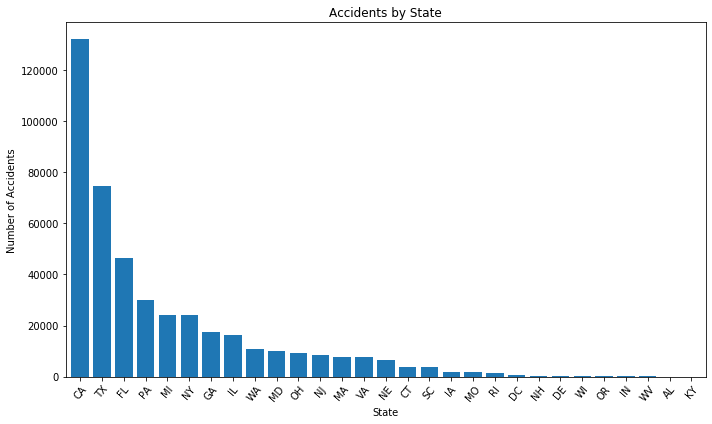

In [34]:
chart_accidents_by_state = accidents_by_state.plot(kind='bar', rot=50, figsize = (10, 6), width = .8)
plt.title("Accidents by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

In [24]:
accident_time = traffic_df["Time"].value_counts()
accident_time.head(50)

8:50 AM    694
8:58 AM    684
8:49 AM    683
8:07 AM    680
8:57 AM    678
8:05 AM    678
8:56 AM    673
7:53 AM    658
7:50 AM    657
8:52 AM    650
7:58 AM    649
7:52 AM    643
8:08 AM    643
8:53 AM    641
8:12 AM    639
7:54 AM    639
8:36 AM    639
8:55 AM    638
8:19 AM    636
7:55 AM    635
8:47 AM    635
8:06 AM    634
7:56 AM    633
8:24 AM    632
7:57 AM    631
8:04 AM    630
8:10 AM    626
8:37 AM    625
8:54 AM    625
8:48 AM    622
8:14 AM    621
7:43 AM    619
8:17 AM    619
7:59 AM    618
7:51 AM    618
8:00 AM    617
7:48 AM    616
8:51 AM    614
8:38 AM    611
8:27 AM    611
8:03 AM    611
8:46 AM    610
8:13 AM    609
7:49 AM    609
8:45 AM    609
7:46 AM    609
7:47 AM    609
8:28 AM    607
8:18 AM    606
8:43 AM    606
Name: Time, dtype: int64

In [26]:
#Bin time of day accidents occur
bins = [24:59, 6:59, 8:59, 12:59, 15:59, 17:59, 20:59, 24:58]
Time = ["Early Hours", "Morning Rush", "Lunch", "Evening Rush", "Evening", "Late", "late Night"]

SyntaxError: invalid syntax (<ipython-input-26-c02b123735ac>, line 2)

In [12]:
accident_time_df["Accident Time Summary"] = pd.cut(traffic_df["Mil_Time"], bins, labels = Time)
accident_time_df

NameError: name 'bins' is not defined

In [27]:
accident_date = traffic_df["Date"].value_counts()
accident_date.head(50)

11/30/2016    2138
12/16/2016    2110
11/29/2016    2081
11/15/2016    2078
11/23/2016    2064
11/21/2016    2054
11/22/2016    2040
11/14/2016    2026
11/10/2016    2024
11/16/2016    2020
1/11/2017     2015
12/5/2016     2007
11/3/2016     2004
11/18/2016    2000
11/8/2016     1995
11/17/2016    1949
11/28/2016    1946
11/7/2016     1945
11/1/2016     1931
1/10/2017     1920
12/15/2016    1906
11/2/2016     1888
10/19/2016    1884
12/20/2016    1879
10/14/2016    1877
10/17/2016    1860
11/4/2016     1856
10/31/2016    1835
11/9/2016     1831
12/8/2016     1821
10/26/2016    1816
2/9/2017      1814
10/4/2016     1808
12/7/2016     1798
12/6/2016     1790
12/13/2016    1784
12/14/2016    1783
2/24/2017     1781
12/12/2016    1780
9/6/2016      1779
9/15/2016     1762
10/13/2016    1761
9/30/2016     1761
1/31/2017     1760
9/1/2016      1757
12/19/2016    1753
12/22/2016    1750
12/1/2016     1749
10/11/2016    1744
9/13/2016     1739
Name: Date, dtype: int64

In [ ]:
#Create binning by month or holiday?

In [15]:
#Distribution plot of accidents occuring on the left/right side of the road
road_side_count = traffic_df["Side"].value_counts()
road_side_count

R    358017
L     80987
          1
Name: Side, dtype: int64

In [16]:
#Distribution plot of accidents occuring on the left/right side of the road by state
traffic_df_grouped_by_side = traffic_df.groupby(["State"])
road_side_count = traffic_df_grouped_by_side["Side"].value_counts()

road_side_count

####May need to create a data frame in order to pivot, 
#need L and R in columns with count in rows, indexed by State

State  Side
AL     L            2
       R            1
CA     R       117160
       L        15024
                    1
CT     R         3516
       L          407
DC     R          478
       L           96
DE     R           79
       L           20
FL     R        38372
       L         7977
GA     R        15003
       L         2296
IA     R         1637
       L          295
IL     R        11575
       L         4879
IN     R           40
       L            1
KY     L            3
MA     R         6257
       L         1467
MD     R         8833
       L         1003
MI     R        18194
       L         6082
MO     R         1773
       L           76
NE     R         4593
       L         1833
NH     R          106
       L           39
NJ     R         6923
       L         1344
NY     R        21431
       L         2628
OH     R         6967
       L         2078
OR     R           34
       L           28
PA     R        19622
       L        10250
RI     R         139